In [1]:
%load_ext tikzmagic
%matplotlib inline

# 범주형 독립변수

이 절에서는 선형회귀분석에 있어서 범주형 독립변수(categorical independent variable)의 사용법을 공부한다.

예제로는 팁 데이터와 보스턴 집값 데이터를 사용한다.

In [2]:
import seaborn as sns

tips = sns.load_dataset("tips").sample(frac=1, random_state=0).reset_index(drop=True)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,17.59,2.64,Male,No,Sat,Dinner,3
1,18.29,3.76,Male,Yes,Sat,Dinner,4
2,19.49,3.51,Male,No,Sun,Dinner,2
3,7.25,1.00,Female,No,Sat,Dinner,1
4,16.27,2.50,Female,Yes,Fri,Lunch,2


In [3]:
import statsmodels.api as sm

boston = sm.datasets.get_rdataset("Boston", "MASS").data
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 레벨이 2개인 범주형 독립변수

범주형 독립변수가 가질 수 있는 값을 <b>레벨(level)</b>이라고 한다. 우선 가장 간단한 모형으로 레벨이 2개인 범주형 독립변수만을 가지는 선형회귀모형을 살펴보자. 예를 들어 팁 데이터에서 time 변수는 Lunch와 Dinner라는 두가지 레벨을 가지는 독립변수이고 sex 변수도 남성 Male과 Female이라는 두 가지 레벨을 가지는 독립변수다. 우선 time 변수로 팁 데이터를 예측하는 선형회귀모형을 만들어보자. 

단 하나의 범주형 독립변수를 사용할 경우 두 가지 선형회귀모형을 만들어 볼 수 있다. 각각의 모형 문자열은 다음과 같다.

* 모형 1 : `tip ~ C(time) + 0`
* 모형 2 : `tip ~ C(time)`

In [4]:
model1 = sm.OLS.from_formula("tip ~ C(time) + 0", tips)
model2 = sm.OLS.from_formula("tip ~ C(time)", tips)

이 두가지 모형이 각각 어떤 의미인지를 파악하기 위해 각각 범주형 변수의 값(레벨)이 어떤 숫자로 인코딩되는지를 살펴보자.

In [5]:
import pandas as pd

X0 = tips[["time"]]
X1 = pd.DataFrame(model1.exog, columns=model1.exog_names).head(10).astype(int)
X2 = pd.DataFrame(model2.exog, columns=model2.exog_names).head(10).astype(int)
pd.concat([X0, X1, X2], axis=1, keys=["raw", "model1", "model2"]).head(10).style.background_gradient(vmin=0, vmax=1)

모형1에서는 C(time)[Lunch] 와 C(time)[Dinner] 라는 두 개의 변수가 만들어지고 이 값은 각각 다음과 같이 인코딩되었다. 모형2에서는 Intercept 와 C(time)[T.Dinner] 라는 두 개의 변수가 만들어지고 이 값은 각각 다음과 같이 인코딩되었다. 

이렇게 범주형 독립변수를 선형회귀분석에 사용하게 되면 레벨의 개수와 같은 개수의 변수가 만들어지는데 이를 <b>더미변수(dummy variable)</b>라고 한다. 더미변수의 값은 0 또는 1 값만을 가질 수 있다. 더미변수의 값을 정하는 규칙을 더미변수 인코딩(encoding) 규칙이라고 한다.

모형1에서 더미변수의 값은 다음과 같이 정해진다.

* Lunch -> C(time)[Lunch] = 1, C(time)[T.Dinner] = 0
* Dinner -> C(time)[Lunch] = 0, C(time)[T.Dinner] = 1

즉 C(time)[Lunch] 변수를 $d_L$, 그 가중치를 $w_L$, C(time)[T.Dinner] 변수를 $d_D$, 그 가중치를 $w_D$이라고 하면,

x = Lunch인 경우

$$ \hat{y} = w_L \cdot d_L + w_D \cdot d_D = w_L \cdot 1 + w_D \cdot 0 = w_L $$

x = Dinner인 경우

$$ \hat{y} = w_L \cdot d_L + w_D \cdot d_D = w_L \cdot 0 + w_D \cdot 1 = w_D $$

가 된다.

따라서 이 모형의 가중치가 의미하는 바는 다음과 같다.

* $w_L$ : x 값이 Lunch인 경우의 팁의 평균값
* $w_D$ : x 값이 Dinner인 경우의 팁의 평균값

이러한 더미 인코딩 방식을 <b>전체랭크 인코딩(full-rank encoding)</b>이라고 한다.

모형2에서는 Intercept 와 C(time)[T.Dinner] 라는 두 개의 변수가 만들어지고 이 값은 각각 다음과 같이 인코딩되었다. 

* Lunch -> Intercept = 1, C(time)[T.Dinner] = 0
* Dinner -> Intercept = 1, C(time)[T.Dinner] = 1

즉 Intercept 변수를 $d_L$, 그 가중치를 $w_L$, C(time)[T.Dinner] 변수를 $d_{D-L}$, 그 가중치를 $w_{D-L}$이라고 하면,

x = Lunch인 경우

$$ \hat{y} = w_L \cdot d_L + w_{D-L} \cdot d_{D-L} = w_L \cdot 1 + w_D \cdot 0 = w_L $$

x = Dinner인 경우

$$ \hat{y} = w_L \cdot d_L + w_{D-L} \cdot d_{D-L} = w_L \cdot 1 + w_D \cdot 1 = w_L + w_{D-L} $$

가 된다.

이 모형의 가중치가 의미하는 바는 다음과 같다.

* $w_L$ : x 값이 Lunch인 경우의 팁의 평균값
* $w_{D-L}$ : x 값이 Dinner인 경우의 팁이 Lunch의 경우와 얼마나 달라지는지에 대한 평균값

이러한 더미 인코딩 방식을 <b>축소랭크 인코딩(reduced-rank encoding)</b>이라고 한다.

그러면 이제 실제로 이 두 가지 모형에 대해 선형회귀분석을 해보자.

In [6]:
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.634
Date:                Thu, 13 Oct 2022   Prob (F-statistic):             0.0578
Time:                        00:37:23   Log-Likelihood:                -423.13
No. Observations:                 244   AIC:                             850.3
Df Residuals:                     242   BIC:                             857.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
C(time)[Lunch]      2.7281      0.167     

모형1의 결과가 뜻하는 바는 x=Lunch인 경우 팁의 평균값은 약 2.73이고 x=Dinner인 경우 팁의 평균값은 약 3.10이라는 뜻이다. 두 변수에 대한 유의확율이 0에 가까우므로 각각의 경우에 대해 팁이 0일 확률은 거의 없다고 볼 수 있다. 

In [7]:
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.634
Date:                Thu, 13 Oct 2022   Prob (F-statistic):             0.0578
Time:                        00:37:24   Log-Likelihood:                -423.13
No. Observations:                 244   AIC:                             850.3
Df Residuals:                     242   BIC:                             857.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.7281      0.16

모형2의 결과가 뜻하는 바는 x=Lunch인 경우 팁의 평균값은 약 2.73이고 x=Dinner인 경우 약 0.375정도 팁이 증가한다는 뜻이다. 이 때 유의확률이 5.8%이므로 만약 유의수준이 10%이면 이 차이는 유의하다고 할 수 있다. 즉, 점심이나 저녁이냐에 따라 팁이 달라진다는 것을 의미한다. 하지만 만약 유의수준이 5% 이하라면 이 변수는 유의하지 않다. 즉 점심이냐 저녁이냐에 따라 팁이 달라진다고 말할 수 없으므로 time 변수는 유의한 선형회귀 독립변수가 될 수 없다.

축소랭크 인코딩 방식에서 기준이 되는 값은 별도로 지정하지 않으면 레벨값을 알파벳 순서로 정렬하여 가장 마지막 값이 된다. 만약 기준이 되는 값을 이와 다르게 지정하고 싶다면 다음과 같이 모형 문자열을 만들어야 한다.

In [8]:
model2_2 = sm.OLS.from_formula("tip ~ C(time, Treatment(reference='Dinner'))", tips)
result2_2 = model2_2.fit()
print(result2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.634
Date:                Thu, 13 Oct 2022   Prob (F-statistic):             0.0578
Time:                        00:37:24   Log-Likelihood:                -423.13
No. Observations:                 244   AIC:                             850.3
Df Residuals:                     242   BIC:                             857.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

이번에는 sex라는 독립변수를 사용하여 같은 분석을 해보자.

In [9]:
model3 = sm.OLS.from_formula("tip ~ C(sex) + 0", tips)
model4 = sm.OLS.from_formula("tip ~ C(sex)", tips)

분석 결과는 다음과 같다.

In [10]:
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.926
Date:                Thu, 13 Oct 2022   Prob (F-statistic):              0.166
Time:                        00:37:24   Log-Likelihood:                -423.98
No. Observations:                 244   AIC:                             852.0
Df Residuals:                     242   BIC:                             859.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
C(sex)[Male]       3.0896      0.110     28.

In [11]:
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.926
Date:                Thu, 13 Oct 2022   Prob (F-statistic):              0.166
Time:                        00:37:24   Log-Likelihood:                -423.98
No. Observations:                 244   AIC:                             852.0
Df Residuals:                     242   BIC:                             859.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.0896      0.110  

모형3의 결과를 보면 남성인 경우 팁의 평균은 3.0896, 여성인 경우 2.8334로 나왔으며 이 값이 0일 가능성은 없다. 

모형4의 결과를 보면 여성인 경우 팁의 평균은 남성의 경우보다 0.2562 정도 감소하지만 유의확률이 16.6%라는 사실에서 이 차이는 유의하지 않다는 것을 알 수 있다. 즉, 성별에 따른 팁의 차이는 없다.

## 레벨이 2개인 범주형 독립변수와 수치형 독립변수를 동시에 사용하는 경우

다음으로 레벨이 2개인 범주형 독립변수와 수치형 독립변수를 동시에 사용하는 경우를 살펴보자. 이번에는 보스턴 집값 데이터를 예제 데이터로 사용한다. 보스턴 집값 데이터에서 chas 데이터는 레벨이 0과 1, 2개인 범주형 독립변수이고 rm 데이터는 수치형 데이터이다. chas, rm 데이터를 동시에 독립변수로 사용하는 선형회귀분석 모형은 아까와 같이 두 가지를 만들 수 있다.

* $y$ = medv
* $x_1$ = chas
* $x_2$ = rm

In [12]:
model5 = sm.OLS.from_formula("medv ~ C(chas) + scale(rm) + 0", boston)
model6 = sm.OLS.from_formula("medv ~ C(chas) + scale(rm)", boston)

전체랭크모형의 경우 범주형 독립변수 chas가 $d_{1,0}$, $d_{1,1}$ 라는 두 개의 더미변수로 나뉘어진다.

* chas = 0 인 경우, $d_{1,0}=1$, $d_{1,1}=0$
* chas = 1 인 경우, $d_{1,0}=0$, $d_{1,1}=1$

예측식은 다음과 같아진다.

$$ \hat{y} = w_{1,0} \cdot d_{1,0} + w_{1,1} \cdot d_{1,1} + w_2 \cdot x_2 $$

따라서 chas = 0 인 경우

$$ \hat{y} =  w_{1,0} \cdot d_{1,0} + w_{1,1} \cdot d_{1,1} + w_2 \cdot x_2 =  w_{1,0} \cdot 1 + w_{1,1} \cdot 0 + w_2 \cdot x_2 = w_{1,0} + w_2 \cdot x_2 $$

chas = 1 인 경우

$$ \hat{y} =  w_{1,0} \cdot d_{1,0} + w_{1,1} \cdot d_{1,1} + w_2 \cdot x_2 =  w_{1,0} \cdot 0 + w_{1,1} \cdot 1 + w_2 \cdot x_2 = w_{1,1} + w_2 \cdot x_2 $$

가 되어 x의 값에 따라 y절편이 달라지는 1차 모형이 된다.

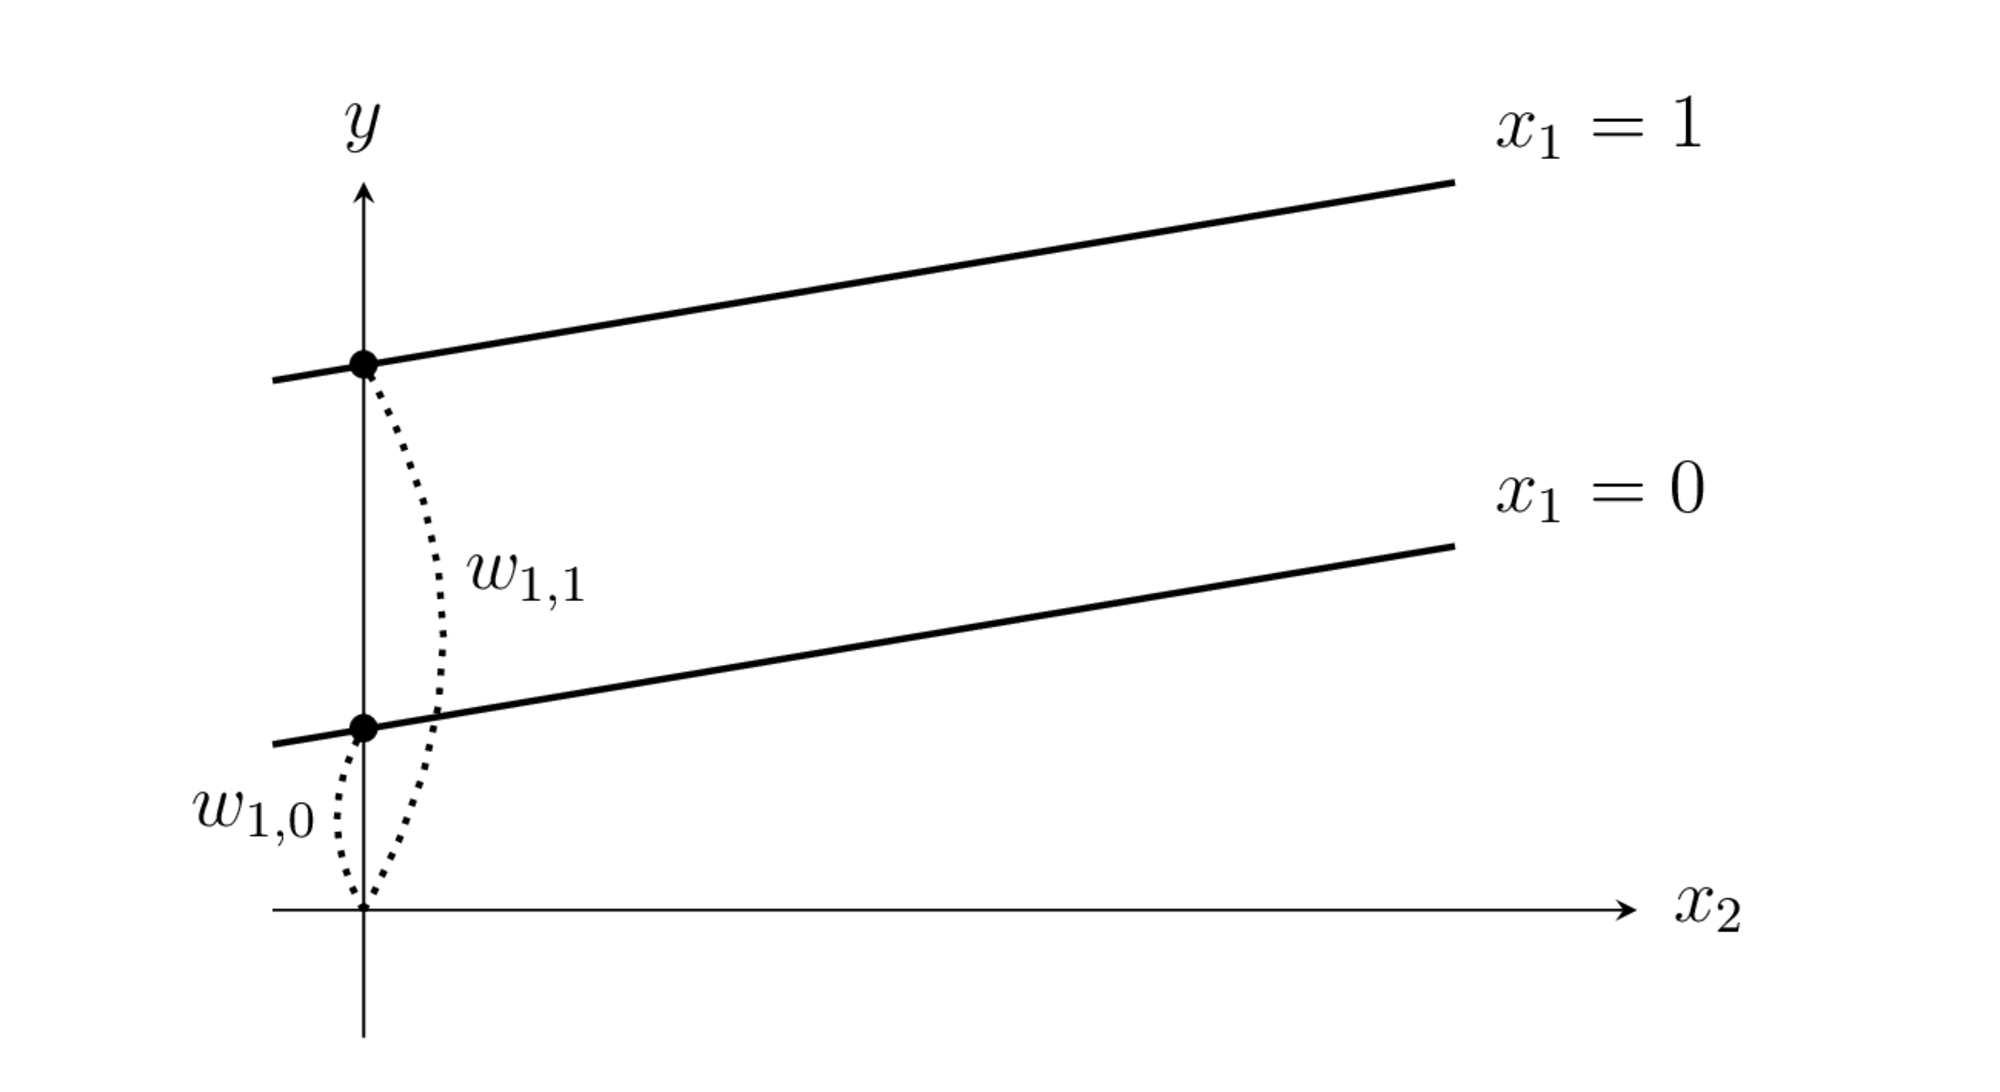

In [13]:
%%tikz -p pgfplots -l arrows.meta,calc -s 2000,1200 -f png

\coordinate (leftbottom) at (1,0);
\coordinate (righttop) at (12,6);
\fill[white,use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines, white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily\large}
}

\node (origin) at (3,1) {};
\draw[->] (3,0.3)--(3,5);
\node at (3,5.3) {$y$};
\draw[->] (2.5,1)--(10,1);
\node at (10.4,1) {$x_2$};
\draw[line width=1pt] (2.5,1.91)--(9,3);
\node at (9.8,3.3) {$x_1=0$};
\node(w1A) at (3,2) {};
\draw[fill] (w1A) circle (2pt);
\node at (2.4,1.5) {$w_{1,0}$};
\draw[line width=1pt] (2.5,3.91)--(9,5);
\node at (9.8,5.3) {$x_1=1$};
\node(w1B) at (3,4) {};
\draw[fill] (w1B) circle (2pt);
\node at (3.9,2.8) {$w_{1,1}$};
\draw[dotted, line width=1pt] (origin.center) edge[bend left] (w1A.center);
\draw[dotted, line width=1pt] (origin.center) edge[bend right] (w1B.center);

전체랭크모형의 경우 범주형 독립변수 chas가 $d_{1,0}$, $d_{1,1-0}$ 라는 두 개의 더미변수로 나뉘어진다.

* chas = 0 인 경우, $d_{1,0}=1$, $d_{1,1-0}=0$
* chas = 1 인 경우, $d_{1,0}=1$, $d_{1,1-0}=1$

예측식은 아까와 동일하다.

$$ \hat{y} = w_{1,0} \cdot d_{1,0} + w_{1,1} \cdot d_{1,1} + w_2 \cdot x_2 $$

chas = 0 인 경우

$$ \hat{y} =  w_{1,0} \cdot d_{1,0} + w_{1,1} \cdot d_{1,1} + w_2 \cdot x_2 =  w_{1,0} \cdot 1 + w_{1,1} \cdot 0 + w_2 \cdot x_2 = w_{1,0} + w_2 \cdot x_2 $$

chas = 1 인 경우

$$ \hat{y} =  w_{1,0} \cdot d_{1,0} + w_{1,1} \cdot d_{1,1} + w_2 \cdot x_2 =  w_{1,0} \cdot 1 + w_{1,1} \cdot 1 + w_2 \cdot x_2 = w_{1,0} + w_{1,1-0} + w_2 \cdot x_2 $$

으로 chas = 0 인 경우 y 절편이 $ w_{1,0}$, chas = 0 인 경우 y 절편이 $w_{1,0} + w_{1,1-0}$ 인 1차 식이 된다.

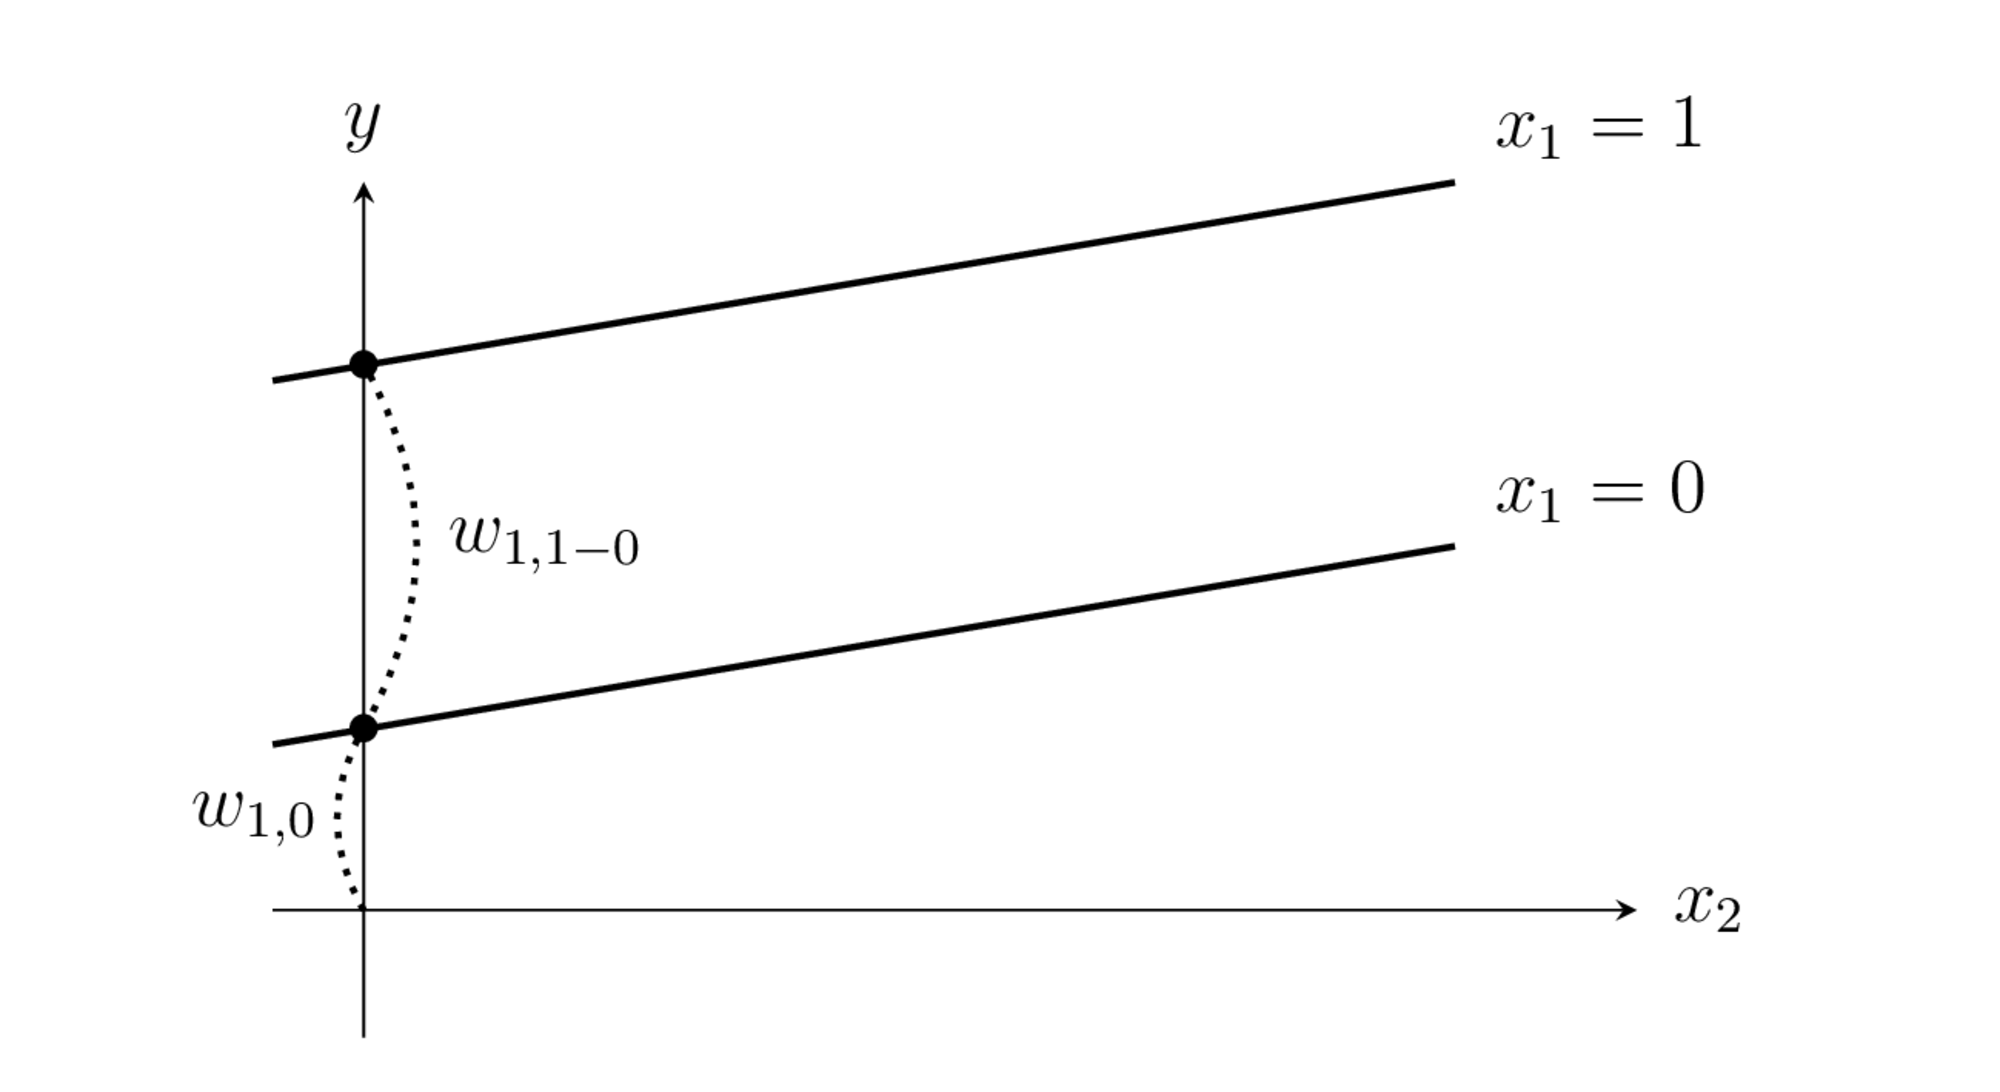

In [14]:
%%tikz -p pgfplots -l arrows.meta,calc -s 2000,1200 -f png

\coordinate (leftbottom) at (1,0);
\coordinate (righttop) at (12,6);
\fill[white,use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines, white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily\large}
}

\node (origin) at (3,1) {};
\draw[->] (3,0.3)--(3,5);
\node at (3,5.3) {$y$};
\draw[->] (2.5,1)--(10,1);
\node at (10.4,1) {$x_2$};
\draw[line width=1pt] (2.5,1.91)--(9,3);
\node at (9.8,3.3) {$x_1=0$};
\node(w1A) at (3,2) {};
\draw[fill] (w1A) circle (2pt);
\node at (2.4,1.5) {$w_{1,0}$};
\draw[line width=1pt] (2.5,3.91)--(9,5);
\node at (9.8,5.3) {$x_1=1$};
\node(w1B) at (3,4) {};
\draw[fill] (w1B) circle (2pt);
\draw[dotted, line width=1pt] (origin.center) edge[bend left] (w1A.center);
\draw[dotted, line width=1pt] (w1A.center) edge[bend right] (w1B.center);
\node at (4.0,3) {$w_{1,1-0}$};

선형회귀 분석결과는 다음과 같다.

In [15]:
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.6
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.36e-75
Time:                        00:37:29   Log-Likelihood:                -1666.8
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3352.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C(chas)[0]    22.2504      0.301     73.799      0.0

In [16]:
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.6
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.36e-75
Time:                        00:37:29   Log-Likelihood:                -1666.8
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3352.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.2504      0.301     73.799   

## 레벨이 3개 이상인 범주형 독립변수의 인코딩

## 복수의 범주형 독립변수가 있는 경우의 인코딩